### Trees ad Random Forests

# Trees
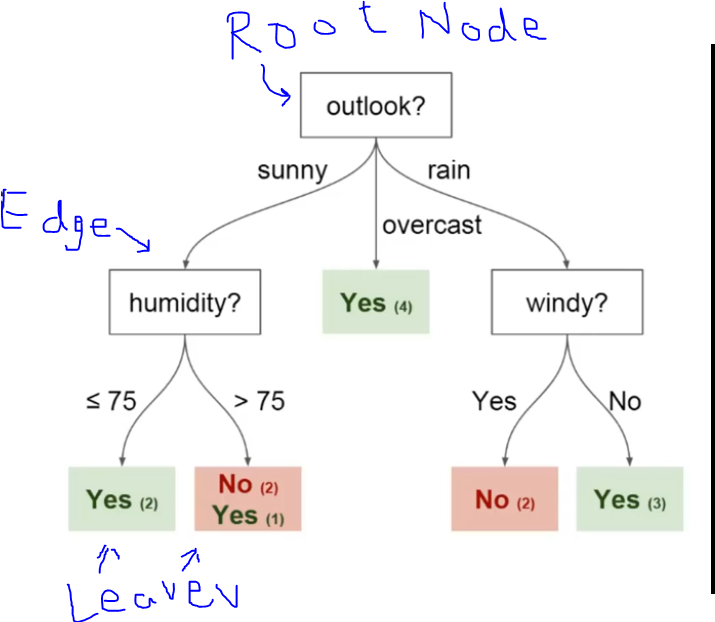

**Splitting the Nodes(Columns) in Such a Way that they clearly didvide our data Into Classes**
* Chosing the best Split is very Important
* This can be done by Two Functions Entropy and Information Gain
* Chosing the best Split to maximize your Information Gain

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
;

''

In [3]:
df=pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


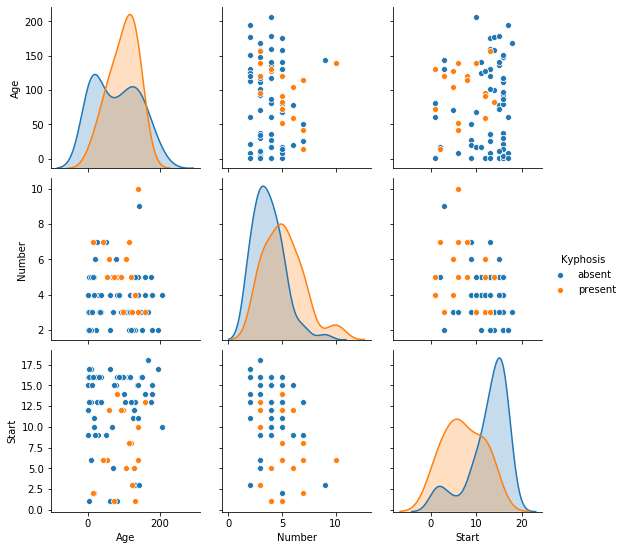

In [5]:
sns.pairplot(df,hue='Kyphosis',)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.3)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
ds=DecisionTreeClassifier()

In [11]:
ds.fit(X_train,y_train)
;

''

In [12]:
pred=ds.predict(X_test)

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [14]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      absent       0.89      0.76      0.82        21
     present       0.29      0.50      0.36         4

    accuracy                           0.72        25
   macro avg       0.59      0.63      0.59        25
weighted avg       0.79      0.72      0.75        25



# Random Forest 

**Random Forests Come in Action to Improve the Performance of Single Decision Tree 
Single decison Tree is not Good Enough because of High Variance Different splits give you different trees with different Performance**
##### Random Forest is ensembling of decorelated trees to decrease the variance 

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfc=RandomForestClassifier(n_estimators=200)

In [23]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
pred2=rfc.predict(X_test)

In [27]:
np.mean(pred2!=y_test)

0.32

In [28]:
a=[True,False,False,True]
np.mean(a)

0.5

In [25]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

      absent       0.84      0.76      0.80        21
     present       0.17      0.25      0.20         4

    accuracy                           0.68        25
   macro avg       0.50      0.51      0.50        25
weighted avg       0.73      0.68      0.70        25



### We find the Best 'n' for Random Forest by looping through 

In [32]:
error=[]
for i in range(10,100):
    rf=RandomForestClassifier(i)
    rf.fit(X_train,y_train)
    pre_i=rf.predict(X_test)
    error.append(np.mean(pre_i != y_test))

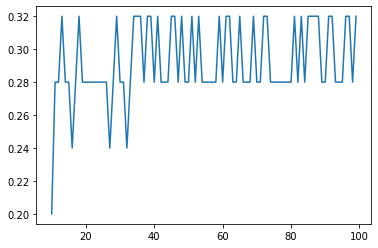

In [35]:
plt.plot(range(10,100),error)

**Random Forest Uses the Multiple trees instead of Single Decision Tree** 
* In Classification Problem most voted class (most predicted class) is Selected 
* In Regression We select the average of prediction of all the tress